# Week 1 - Normalization and data types

This first week is going to be a warm-up week where we consider different statistical tools data types.

Lets first import the libraries that we are going to need.

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

## Exercise 1: Sample statistics and normalization

Let $X$ and $Y$ be two random variables, denoting age and weight, respectively.
Consider a random sample of size $n=20$ from these two variables

In [39]:
X = np.array([69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76])
Y = np.array([153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140, 150, 165, 185, 210, 220])

**a)** Find the mean, median and mode for $X$  

In [18]:
print("Mean:", np.mean(X))
print("Median:", np.median(X))
print("Mode:", stats.mode(X))

Mean: 71.45
Median: 71.5
Mode: ModeResult(mode=array([74]), count=array([3]))


**b)** What is the variance for $Y$?  

In [69]:
mean = np.mean(Y)
np.sum([abs(y - mean) ** 2  for y in Y]) / len(Y)

1369.2099999999998

**c)** What is the probability of observing an age of 80 or higher?  

In [38]:
len(np.where(X >= 80)[0]) / len(X)

0.0

**d)** Plot the normal distribution for $X$. Consider if the data seems to fit a normal distribution.  

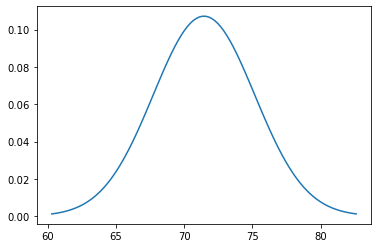

In [114]:
#mu = 0
#variance = 1
#sigma = math.sqrt(variance)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#plt.plot(x, stats.norm.pdf(x, mu, sigma))
#plt.show()
X = sorted(X)
foo = np.linspace(np.mean(X) - 3 * np.std(X), np.mean(X) + 3 * np.std(X), 100)
plt.plot(foo, stats.norm.pdf(foo, np.mean(X), np.std(X)))
plt.show()

**e)** Find the 2-dimensional mean $\hat \mu$ and the covariance matrix $\widehat \Sigma$ for these two variables.  

In [116]:
Z = np.array([X, Y])

np.cov(Z, bias=True)

array([[  13.8475,   44.785 ],
       [  44.785 , 1369.21  ]])

**f)** Normalize the data with _range normalization_ to the range $[0, 1]$  

In [111]:
print([(i - np.min(X)) / (np.max(X) - np.min(X)) for i in X])
print()
print([(i - np.min(Y)) / (np.max(Y) - np.min(Y)) for i in Y])

[0.0, 0.0, 0.07692307692307693, 0.07692307692307693, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.3076923076923077, 0.3076923076923077, 0.38461538461538464, 0.46153846153846156, 0.46153846153846156, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6923076923076923, 0.6923076923076923, 0.7692307692307693, 0.7692307692307693, 1.0]

[0.2679738562091503, 0.4117647058823529, 0.28104575163398693, 0.1503267973856209, 0.39215686274509803, 0.24836601307189543, 0.0196078431372549, 0.16339869281045752, 0.5751633986928104, 0.11764705882352941, 0.1830065359477124, 1.0, 0.477124183006536, 0.0, 0.1830065359477124, 0.24836601307189543, 0.3464052287581699, 0.477124183006536, 0.6405228758169934, 0.7058823529411765]


**g)** Normalize the data with _standard score normalization_, such that is has mean 0 and standard deviation 1.  

In [110]:
print([(i - np.mean(X)) / (np.std(X)) for i in X])
print()
print([(i - np.mean(Y)) / (np.std(Y)) for i in Y])

[-1.464572298184524, -1.464572298184524, -1.195843436132318, -1.195843436132318, -0.9271145740801118, -0.9271145740801118, -0.6583857120279057, -0.3896568499756996, -0.3896568499756996, -0.1209279879234935, 0.1478008741287126, 0.1478008741287126, 0.6852585982331248, 0.6852585982331248, 0.6852585982331248, 0.9539874602853309, 0.9539874602853309, 1.222716322337537, 1.222716322337537, 2.0289029084941554]

[-0.3161919657536128, 0.2783570296805315, -0.2621420570777815, -0.8026411438360945, 0.19728216666678455, -0.39726682876735975, -1.3431402305944076, -0.7485912351602632, 0.9539808881284227, -0.9377659155256728, -0.6675163721465163, 2.7106029200929402, 0.548606573059688, -1.4242150936081546, -0.6675163721465163, -0.39726682876735975, 0.008107486301375002, 0.548606573059688, 1.2242304315075794, 1.4944799748867357]


## Exercise 2: Robustness
Determine whether the following statements are true or false and explain why.
 - Mean is robust against outliers -> False. The mean is affected by an outlier since we take the sum over the data points. So [1,2,3,1000] would yield a high mean
 - Median is robust against outliers -> True. The median is the middle value in the data set, thus it is not affected by extreme outliers
 - Standard deviation is robust against outliers -> False. std is defined using the mean thus it is not robust

## Exercise 3: More on robustness
Provide an informal definition of when a measure is robust.

If the measure does not depend on aggregating the values?

## Exercise 4: Independence analysis
Please explain what the idea of independence analysis is using contingency tables; for which kind of data is this particularly relevant? 

It is a test used to show if multivariate variables are related or independent.

## Exercise 5: Contingency table and $\chi^2$ statistics
In the table below,  assuming that $X_1$ is discretized into three bins, as follows: $[-2, -0.5]$, $[-0.5, 0.5]$, and $[0.5, 2]$.

![Table 3.11](graphics/3.11.png)

Answer the following questions

**a)** Construct the contingency table between the discretized $X_1$ and $X_2$ attributes . Include the marginal counts.  
**b)** Compute the $\chi^2$ statistic between them.  
**c)** Determine whether they are dependent or not at the 5% significance level. Use the $\chi^2$ critical values from Table 3.10.

![Table 3.10](graphics/3.10.png)

1)

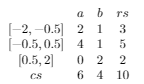

2)

3)

In [127]:
table = np.array([[2,4,0], [1,1,2]]).T

stats.chisquare(table)


Power_divergenceResult(statistic=array([4. , 0.5]), pvalue=array([0.13533528, 0.77880078]))

## Exercise 6: Working with Metrics

Consider the following situation: 

We know some distances between data points: $d(p_1,p_2)=1$, $d(p_1,p_3)=2$, $d(p_3, p_4)=1$. 
We also know that $d$ is a metric. 

1. What do we know about the remaining distances? 
2. Do we need to compute further distances if we want to find the two points that are most similar to $p_1$? 
3. Can $p_4$ be closer to $p_2$ than $p_3$ is to $p_2$? 

# Optional Exercises

## Exercise 7: Mean absolute deviation 
Define a measure of deviation called _mean absolute deviation_ for a random variable $X$ as follows:

$$
\frac{1}{n} \sum_{i=1}^n |x_i - \mu|
$$

Is this measure robust? Why or why not?

## Exercise 8: Correlation

Consider the table below. Assume that both the attributes $X$ and $Y$ are numeric, and the
table represents the entire population. If we know that the correlation between $X$
and $Y$ is zero, what can you infer about the values of $Y$? (Find a relationship between a, b and c)

|$X$ | $Y$ |
|:---:|:---:|
|$1$|$a$|
|$0$|$b$|
|$1$|$c$|
|$0$|$a$|
|$0$|$c$|

# Exercise 9: 3-way contingency table

Consider the 3-way contingency table for attributes $X$,$Y$,$Z$ shown in the table below.
Compute the $\chi^2$ metric for the correlation between $Y$ and $Z$. Are they dependent
or independent at the 95% confidence level? See Table 3.10 above for $\chi^2$ values.

![Table 3.9](graphics/3.9.png)

# Exercise 10: Mixed data

Consider the "mixed" data given in the table below. Here $X_1$ is a numeric attribute and
$X_2$ is a categorical one. Assume that the domain of $X_2$ is given as $dom(X_2) = \{a, b\}$.
Answer the following questions.
**a)** What is the mean vector for this dataset?  
**b)** What is the covariance matrix?  

![Table 3.11](graphics/3.11.png)

